In [1]:
# Load in libraries

import warnings
warnings.filterwarnings('ignore')

#libraries for handling data
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

#label encoders
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_palette('Set2')

#libaries for modelling
# Regression Modelling Algorithms
import statsmodels.api as sm
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor


In [2]:
train = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - House Prices/train.csv', index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - House Prices/test.csv', index_col=0)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [5]:
all_data = pd.concat((train,test))

In [6]:
test.shape, train.shape

((1459, 79), (1460, 80))

In [7]:
all_data.shape

(2919, 80)

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [9]:
all_data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

# handling null values

In [10]:
#all_data.iloc[:,all_data.dtypes==object]
a = all_data.select_dtypes(include=['object']).columns
a

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [11]:
# Null values of Electrical and Total BsmtSF would be replaced by mode
for col in ['Electrical', 'RoofStyle', 'Neighborhood']:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [12]:
#replace all null values to 0
for col in a:
    all_data[col] = all_data[col].fillna('None')

In [13]:
b = all_data.select_dtypes(include=['float64', 'int64']).columns

In [14]:
# Null values of rest of numerical types variables would better be replaced by median of neighborhood group
for col in b:
    all_data[col] = all_data.groupby('Neighborhood')[col].transform( lambda x: x.fillna(x.median))

# vectorization/ Encoding

In [15]:
for col in a:
    print('{}: {}'.format(col, all_data[col].unique()  ))

Alley: ['None' 'Grvl' 'Pave']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtCond: ['TA' 'Gd' 'None' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual: ['Gd' 'TA' 'Ex' 'None' 'Fa']
CentralAir: ['Y' 'N']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'None']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' 'None']
Fence: ['None' 'MnPrv' 'GdWo' '

In [16]:
print((all_data['Alley'].unique()))
list(le.fit_transform(all_data['Alley'].unique()) )
#le.fit_transform(all_data['Alley'])

['None' 'Grvl' 'Pave']


[1, 0, 2]

In [17]:
#x = le.fit_transform(all_data['Alley'].unique())
#y = le.inverse_transform(x)
#list(x), list(y)

In [18]:
#Encoding object type variables
for col in a:
#for col in all_data.columns:
    all_data[col] = le.fit_transform(all_data[col])

In [19]:
#cols = ['YearBuilt', 'YearRemodAdd', 'YrSold']
#for col in cols:
#    all_data[col] = le.fit_transform(all_data[col])

In [20]:
all_data.head().transpose()

Id,1,2,3,4,5
1stFlrSF,856,1262,920,961,1145
2ndFlrSF,854,0,866,756,1053
3SsnPorch,0,0,0,0,0
Alley,1,1,1,1,1
BedroomAbvGr,3,3,3,3,4
BldgType,0,0,0,0,0
BsmtCond,4,4,4,1,4
BsmtExposure,3,1,2,3,0
BsmtFinSF1,706,978,486,216,655
BsmtFinSF2,0,0,0,0,0


In [59]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null float64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null float64
BsmtCond         2919 non-null float64
BsmtExposure     2919 non-null float64
BsmtFinSF1       2919 non-null object
BsmtFinSF2       2919 non-null object
BsmtFinType1     2919 non-null float64
BsmtFinType2     2919 non-null float64
BsmtFullBath     2919 non-null object
BsmtHalfBath     2919 non-null object
BsmtQual         2919 non-null float64
BsmtUnfSF        2919 non-null object
CentralAir       2919 non-null float64
Condition1       2919 non-null float64
Condition2       2919 non-null float64
Electrical       2919 non-null float64
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null float64
ExterQual        2919 non-null float64
Exterior1st

In [39]:
for col in a:
#    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')
#    all_data[col] = all_data[col].astype(float)
    all_data[col] = all_data[col].convert_objects(convert_numeric=True)

In [28]:
#all_data.convert_objects(convert_numeric=True)

In [24]:
#scaler application
scaled_SalePrice = scaler.fit_transform( all_data[0:1460][['SalePrice']] )  

In [25]:
scaled_SalePrice

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

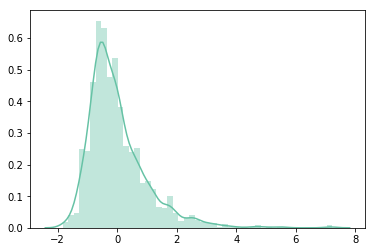

In [37]:
sns.distplot(scaled_SalePrice)

In [41]:
all_data.select_dtypes(include=['object']).columns

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
       'SalePrice', 'TotalBsmtSF'],
      dtype='object')

# choose x variables

In [61]:
scaled_X = scaler.fit_transform(all_data[['OverallQual','GrLivArea',  \
                     '1stFlrSF', 'FullBath',\
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']])

In [63]:
x_train = scaled_X[0:1460]
y_train = scaled_SalePrice
x_test = scaled_X[1460::]

In [66]:
#linear regression
#lm = LinearRegression()
#lm.fit(x_train, y_train)
#y_pred_lm = lm.predict(x_test)
#lm.score(x_train, y_train) 


lm = sm.OLS(y_train, x_train).fit() ## sm.OLS(output, input)
y_pred_lm = lm.predict(x_test)

# Print out the statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     658.7
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:58:19   Log-Likelihood:                -1028.7
No. Observations:                1460   AIC:                             2071.
Df Residuals:                    1453   BIC:                             2108.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4000      0.021     19.193      0.000       0.359       0.441
x2             0.3457      0.027     12.585      0.000       0.292       0.400
x3             0.1776      0.016     10.843      0.000       0.145       0.210
x4            -0.0554      0.019     -2.911      0.004      -0.093      -0.018
x5            -0.0026      0.023     -0.117      0.907      -0.047       0.042
x6             0.1603      0.019      8.409      0.000       0.123       0.198
x7             0.0745      0.017      4.314      0.000       0.041       0.108
==============================================================================
Omnibus:                      433.774   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42649.960
Skew:                          -0.281   Prob(JB):                         0.00
Kurtosis:                      29.472   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#random forest regression
randomForest = RandomForestRegressor()
randomForest.fit(x_train, y_train)
y_pred_randomForest = randomForest.predict(x_test)
randomForest.score(x_train, y_train) 

C:\Users\reejung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9690296146418165

In [68]:
#support vector regression
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
svr.score(x_train, y_train) 

C:\Users\reejung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8689109819789179

In [69]:
#gradient boosting regression
gradientBoosting = GradientBoostingRegressor()
gradientBoosting.fit(x_train, y_train)
y_pred_gradBoost = gradientBoosting.predict(x_test)
gradientBoosting.score(x_train, y_train)

C:\Users\reejung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9238220225990159

In [70]:
y_pred_gradBoost

array([-0.72856153, -0.42999388, -0.19866708, ..., -0.39534611,
       -0.50637912,  0.62394847])

In [71]:
y_new_inverse = scaler.inverse_transform(y_pred_gradBoost)

ValueError: operands could not be broadcast together with shapes (1459,) (7,) (1459,) 

In [ ]:
y_new_inverse

In [ ]:
Id = test['Id']
result = pd.DataFrame( { 'Id': Id , 'SalePrice': y_new_inverse} )
result.shape
result.head()
result.to_csv( 'submission.csv' , index = False )